In [2]:
#importamos el módulo que vamos a usar 
import random   

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Ejercicio 4:

a) Calcular $E[X_i]$ y $V[X_i]$




$E[X_i] = \sum_i x_{i}P(X=x_{i}) = 1*P(x=1) + 0*P(x=0) = 1*\frac{\pi}{4} + 0 * 1-\frac{\pi}{4} = \frac{\pi}{4} \approx 0.785398$ 

$V[x_{i}] = E[X_{i}^{2}] - E[X_i]^{2} = 1^{2}*\frac{\pi}{4} - (\frac{\pi}{4})^{2} = \frac{\pi}{4}(1-\frac{\pi}{4}) \approx 0.1685479$

Para el experimento de simulación, definimos $Z_N = \frac{X_1 + X_2 + ... + X_N}{N}$

En el siguiente código se obtiene la esperanza y la varianza mediante simulación

In [59]:
#Utilizando el mismo código para calcular la esperanza y varianza por simulación
from statistics import mean, variance
def pi_mc(n):
    pi = 0
    lx = []
    ly = []
    counter = 0
    xi = 0
    Z = []
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
            lx.append(counter)
            ly.append(4.0*float(counter)/(i + 1))
            xi = 1
            Z.append(xi) #Se añade el valor de xi = 1
        else:
            xi = 0
            Z.append(xi) #Se añade el valor de xi = 0
        pi = 4.0*float(counter)/(i + 1)
        e = np.absolute((pi - np.pi)/np.pi)
        
    media = mean(Z) #Obtenemos la media de la V.A xi
    p=np.pi/4
    errorE = np.absolute((media - (p))/(p)) 
    varianza = variance(Z)
    errorV = np.absolute((varianza - ((p)*(1-p)))/(p))
    print("pi =", pi)
    print("error =", e)
    print("Valor esperado obtenido mediante simulación", media,"Error en el calculo de la esperanza", errorE)
    print("Valor de la varianza por simulación", varianza, "Error respecto al valor real", errorV)
    
    fig = plt.figure(1, figsize=(8, 8))        
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación de $\pi$")
    plt.grid()
    plt.plot(lx, ly, color="blue", markersize=1)
    plt.show()

pi = 3.1484
error = 0.0021668456610466173
Valor esperado obtenido mediante simulación 0.7871 Error en el calculo de la esperanza 0.0021668456610466173
Valor de la varianza por simulación 0.1675903490349035 Error respecto al valor real 0.0012191768953441623


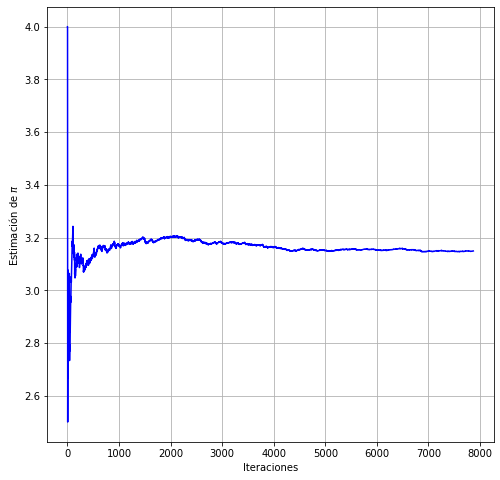

In [60]:
pi_mc(10000)

## Ejercicio 5:
a) Calcular  $E[Z_N]$ y $V[Z_N]$
b) ¿Cuál debe ser el valor de $N$ para que el error sea de 0.01?

Sea $Z_N = \frac{X_1 + X_2 + ... + X_N}{N}$ para todo el círculo, si usamos un cuarto de círculo entonces necesitamos que 

$Z_N = 4 \frac{X_1 + X_2 + ... + X_N}{N}$

Entonces la esperanza será:

$E[Z_N]=E[4 \frac{X_1 + X_2 + ... + X_N}{N}]=\frac{4}{N}E[x_{1} + x_{2} + ... +x_{N}] = \frac{4}{N}[E[x_{1}] +  E[x_{2}] + ... + E[x_{N}]] $

$  \ \ \ \ \ \ \ \ \ \ \ \    =\frac{4}{N}[NE[x_{i}]]$

$    \ \ \ \ \ \ \ \ \ \ \ \      =\frac{4}{N}[N\frac{\pi}{4}]$

$  \ \ \ \ \ \ \ \ \ \ \ \   = \pi$

$V[Z_N]= (\frac{4}{N})^{2}[NV[Z_N]]$

$    \ \ \ \ \ \ \ \ \ \ \ \      =\frac{16}{N^{2}}[N(\frac{\pi}{4}-\frac{\pi^{2}}{4^{2}})]$

$    \ \ \ \ \ \ \ \ \ \ \ \      =\frac{16}{N}[\frac{\pi}{4}(1-\frac{\pi}{4})]$

Por la ley de los grandes números:

$P(|Z_{N}-\pi|)<\frac{16p(1-p)}{N\epsilon^{2}}$

Entonces si queremos que el error sea menor que 0.01 $P(|Z_{N}-\pi|)=1$

Así $N < \frac{16p(1-p)}{\epsilon^{2}} = 26967.66$  

pi = 3.1407275559016576
error = 0.0002753691466482633
Valor esperado obtenido mediante simulación 0.7851818889754144 Error en el calculo de la esperanza 0.0002753691466482633
Valor de la varianza por simulación 0.16867754516185476 Error respecto al valor real 0.0001650842063731017


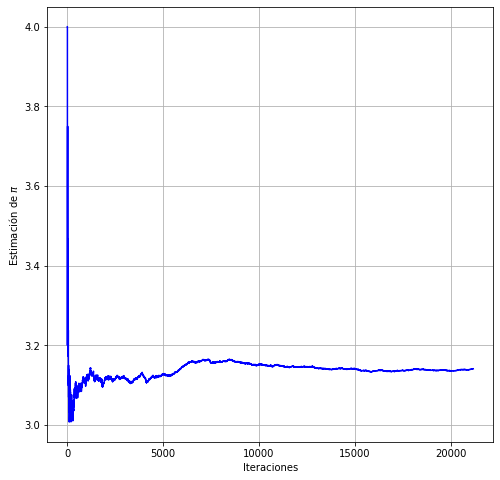

In [66]:
pi_mc(26967)

Conclusión: vemos que el error disminuye a menos de 0.01

# Integrales

In [73]:
def riemannplot(f, a, b, ra, rb, n):
    # f es la función 
    # a y b son los limites del eje x para graficar la funcion f
    # ra y rb son los limites del intervalo en el eje x del que queremos calcular la suma
    # n es el numero de rectangulos que calcularemos

    atenuacion = (b-a)/100
    x = np.arange(a, b+atenuacion, atenuacion)
    
    plt.plot(x, f(x), color='red')

    delta_x = (rb-ra)/n
    riemannx = np.arange(ra, rb, delta_x)
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)

    plt.bar(riemannx,riemanny,width=delta_x,alpha=0.5,edgecolor = 'black',facecolor='green')
   
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    plt.title('Suma de Riemann por la izquierda de f(x)')
    plt.figtext(0.1,-0.05, "Suma de Riemann: %.5f " %(riemann_sum), color='b')
    plt.savefig('riemann.png')
    plt.show()

In [70]:
def f(x):
    return np.sqrt(np.arctan(x))

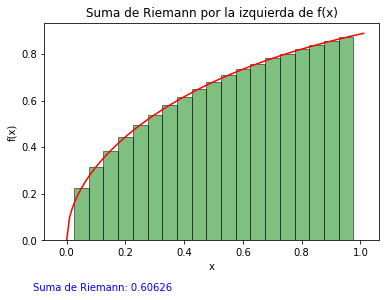

In [71]:
riemannplot(f, 0, 1.001, 0, 1.001, 20)

## Calculando el área mediante simulación de Montecarlo ##

In [19]:
def integral_mc(n):
    pi = 0
    lx = []
    ly = []
    counter = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if y < np.sqrt(np.arctan(x)):
            counter = counter + 1
        i=i+1
        pi = counter/i
        lx.append(i)
        ly.append(pi)
    print("Valor de la integral =", counter/i)
   # print("error =", e)
    
    fig = plt.figure(1, figsize=(8, 8))        
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación de la integral")
    plt.grid()
    plt.plot(lx, ly, color="blue", markersize=1)
    plt.show()

Valor de la integral = 0.644


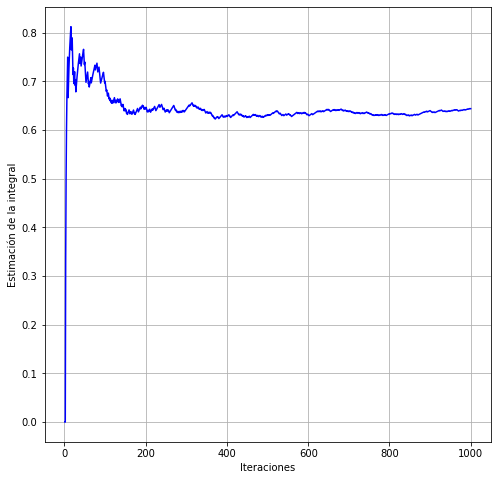

In [20]:
integral_mc(1000)